# Visualisation with Matplotlib package

From __matplotlib__ by John Hunter and Michael Droettboom in 
[_The Architecture of Open Source Applications_](http://www.aosabook.org/en/index.html)

> matplotlib is a Python-based plotting library with full support for 2D and limited support for 3D graphics, widely used in the Python scientific computing community. The library targets a broad range of use cases. It can embed graphics in the user interface toolkit of your choice, and currently supports interactive graphics on all major desktop operating systems using the GTK+, Qt, Tk, FLTK, wxWidgets and Cocoa toolkits. It can be called interactively from the interactive Python shell to produce graphics with simple, procedural commands, much like Mathematica, IDL or MATLAB. matplotlib can also be embedded in a headless webserver to provide hardcopy in both raster-based formats like Portable Network Graphics (PNG) and vector formats like PostScript, Portable Document Format (PDF) and Scalable Vector Graphics (SVG) that look great on paper.

## Matplotlib Architecture and Principles of Usage

## Simple use of Matloptlib (pylab) for 2D plotting

We use `numpy` arrays to create a sinusoidal time-dependent oscillations (of would be electric voltage)

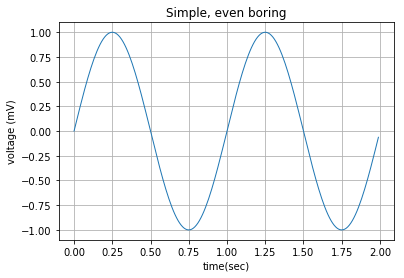

In [1]:
import numpy as np
import pylab as pl
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)
pl.plot(t, s, linewidth=1.0)
pl.xlabel('time(sec)')
pl.ylabel('voltage (mV)')
pl.title('Simple, even boring')
pl.grid(True)
pl.show()

## An example with two subplots

Show a plot with multiple curves, each with its own style (immediately recognaised by anyone with
Matlab experience. A plot can have multiple _sub-plots_. The example also demonstrates the "direct"
array multiplication of NumPy arrays -- each element of the product is the product of the corresponding
factor elements; this is how all standard operation work for NumPy arrays.

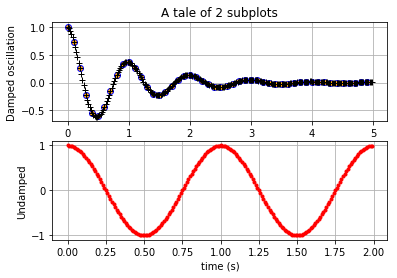

In [3]:
def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
#     return np.multiply(s1,e1)
    return s1 * e1

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

pl.subplot(211)
l = pl.plot(t1, f(t1), 'bo', t2, f(t2), 'k+', markerfacecolor='orange')
pl.grid(True)
pl.title('A tale of 2 subplots')
pl.ylabel('Damped oscillation')

pl.subplot(212)
pl.plot(t3, np.cos(2*np.pi*t3), 'r.')
pl.grid(True)
pl.xlabel('time (s)')
pl.ylabel('Undamped')

pl.show()

## A simple histrogram

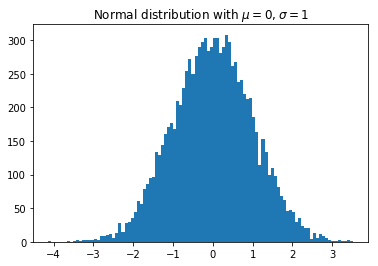

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()

## Scatter Plots and Histograms

A scatter plot and histrograms plotted together to reveal correlations in data

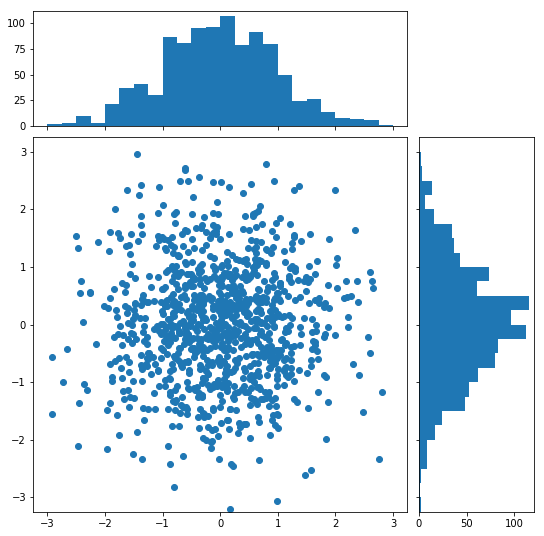

In [5]:
from matplotlib.ticker import NullFormatter
import pylab as pl

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

nullfmt   = NullFormatter()         # no labels

# definitions for the axes 
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
pl.figure(1, figsize=(8,8))

axScatter = pl.axes(rect_scatter)
axHistx = pl.axes(rect_histx)
axHisty = pl.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] )
lim = ( int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim( (-lim, lim) )
axScatter.set_ylim( (-lim, lim) )

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

pl.show()


## Pie Carts

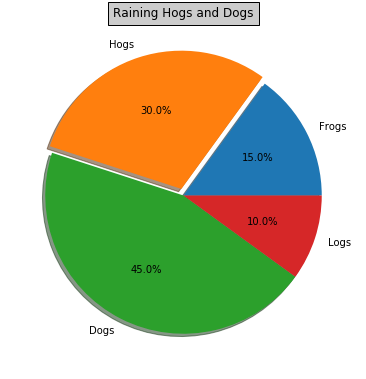

In [8]:
pl.figure(1, figsize=(6,6))
ax = pl.axes([0.1, 0.1, 0.8, 0.8])

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15,30,45, 10]

explode=(0, 0.05, 0, 0)
pl.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
pl.title('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})

pl.show()

## An example with complex plot annotations
A rich formatting features to include complex formulae written in $\TeX$ and its dialects.

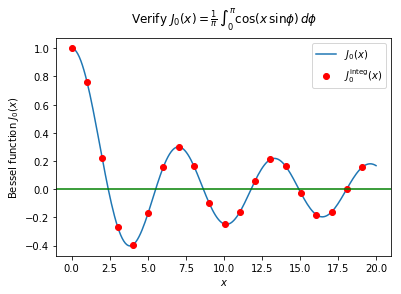

In [9]:
import math
from scipy.integrate import quad
from scipy.special import j0

# pl.ion()

def j0i(x):
    """Integral to get Bessel J_0(x)"""
    def integrand(phi):
        return math.cos(x*math.sin(phi))
    return (1.0/math.pi)*quad(integrand, 0, math.pi)[0]


x = np.linspace(0,20,200) # grid 200 points between 0..20
y = j0(x) # sample J_0 at ALL values of x
x1 = x[::10] # subsample of the original grid x every 10th point
y1 = list(map(j0i, x1)) # evaluate integral from all points in x1

# make plot (without displaying) with the above values 

pl.plot(x,y,label=r"$J_{0}(x)$"); # semicolon supresses display
pl.plot(x1, y1, 'ro', label=r'$J_0^{\mathrm{integ}}(x)$');
pl.axhline(0,color='green',label='_nolegend_');
pl.title(r'Verify $J_0(x)=\frac{1}{\pi}\,\int_0^{\pi}\cos(x\,\sin\phi)\,d\phi$',
		verticalalignment='bottom');
pl.xlabel('$x$');
pl.ylabel("Bessel function $J_0(x)$")
pl.legend();
# pl.ioff()
pl.show()

## Mandelbrot set - the power of NumPy array indexing

Since Ritchie and Kernighan, who used the  `hello_world.c` program to introduce the C
programming language, every language or technology (like visualisation) include in their exposition such introductory example. For computer graphics, its "Hello World" example
has often been the _Mandelbrot Set_, a program which computes and displays
a two dimensional (one complex dimensional $z = x + i\cdot y, \;\sqrt{-1}$) set 
of a fractal nature.

The Mandelbrot set describes a phase portrait of a family of dynamic systems 
generated by 1D (complex dimension) quadratic complex map (see below). 
It is defined as the set of 
all values of the parameter $c$, for which the corresponding _Julia sets_
(limiting sets of bounded orbits) are each connected.
In simple terms, the Mandelbrot set shows which points in the complex plain, 
$\boldsymbol{z}\in\mathbb{C}$,
will escape to infinity and how quickly, and which will remain in a bounded region near $0$.
The quadratic map

  $$\boldsymbol{z} \to \boldsymbol{z}' = f_{c}(\boldsymbol{z}) = \boldsymbol{z}^{2} + c$$

(where $c$ is a complex constant), will generate an orbit:

  $$
  \boldsymbol{z}_{1}\stackrel{f_{c}}{\mapsto}\boldsymbol{z}_{2}\equiv
  f_{c}(\boldsymbol{z}_{1})\mapsto\boldsymbol{z}_{3}\mapsto
  \ldots\mapsto\boldsymbol{z}_{n}\mapsto\ldots
  $$

The plotting of Mandelbrot set is done through the use of the _escape condition_: 

  $$
  \vert|\boldsymbol{z}_{n}\vert| \geqslant r_{c}=\min(|c|,2),
  $$

according to which if an orbit point has gone outside the $r_c$ circle, it will escape to infinity.

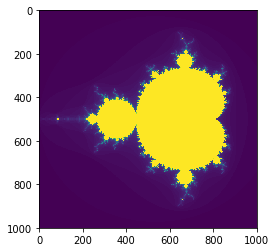

In [10]:
def mandelbrot(h,w, maxit=100):
    '''Returns an image of the Mandelbrot fractal of size (h,w).
    '''
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ] #create an 2d mesh (_o_grid)
    c = x+y*1j # a 2d array representing a grid of points on complex plane
    z = c 
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z  = z**2 + c
        diverge = z*np.conj(z) > 2**2         # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        # div_now = np.logical_and(diverge,divtime==maxit) # this is an alternative
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime

pl.imshow(mandelbrot(1000,1000))
pl.show()

## Waterworld - terrain plot with real (big) data

(used as an assignment in 2016 in COMP1730)

__The task__

1. read landscape elevation data from a file and compute the land area above 
2. plot the results "nicely" as a relief map for a given sea level


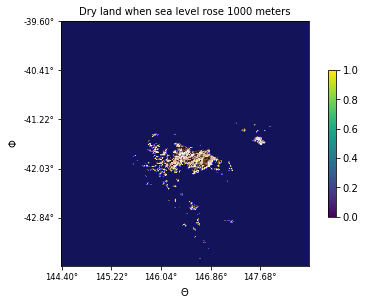

In [15]:
import numpy as np
import pylab as pl
from matplotlib.colors import LightSource

ECIRCLE = 40075 # equatorial circle
POLCIRCLE = 40007 # polar circle
VERTICAL_RESOLUTION = 100 # number of iterations when flooding

# Using the structured array to contain all -- geodesic coordinates and heights
dt = np.dtype([('y', np.float), ('x', np.float), ('height', np.float)])

# Read in the data (later, we should consider memmap approach!)
datafile = '../data/tas1k.txt.gz'
data = np.genfromtxt(datafile, dtype=dt, delimiter=' ', autostrip=True, invalid_raise=True)

# choose the water level
water_level = 1000
# Calculate the longitudinal and latitudinal spans of the data set
y0 = data[0][0]
N = 0
for d in data:
    if not d[0] == y0:
        break
    else:
        N += 1

M = data.size // N

# Reshaping the array
data = data.reshape(M,N)

# Extract the longitudinal ('x') and and latitudinal ('y') spans,
# assuming that they are homogeneous (constant over the resiprocal coordinate)!
xs = data['x'][0]
ys = data['y'][:,0]

# Calculating the size of intervals (they may not be constant!)
dxs = xs[1:] - xs[:-1]
dys = ys[:-1] - ys[1:]

# Calculating the segment areas
areas = (ECIRCLE*POLCIRCLE/(360*360) *
		(dxs * np.cos(np.radians(ys[:-1, None])) * dys[:, np.newaxis]))

# Extracting the heights
heights = data['height']

# Calculating the mean values for x- and y-size of the data segments
delta_y_average = np.average(dys * POLCIRCLE / 360)
delta_x_spreads = np.average(dxs) *((ECIRCLE / 360) * np.cos(np.radians(ys)))
delta_x_average = np.average(delta_x_spreads)

# curtailing the height map
heights = heights[:-1,:-1]

# Plotting the data: the map of land surrounded by sea
fig, ax = pl.subplots(ncols=1, figsize=(6.5, 5))

# Plotting the "map" -- land surrounded by [risen] seas
heights[heights < water_level] = 0

ls = LightSource(azdeg=xs[0], altdeg=ys[0])
cmap = pl.cm.terrain
# cmap = pl.cm.gist_earth # another option for colormap

rgb = ls.shade(heights, cmap=cmap, blend_mode='overlay')#, dx=xs[0], dy=ys[0])

# Annotating the axes
ax.set_xticks(range(0,N,int(N/5)))
ax.set_xticklabels(['{:.2f}\u00B0'.format(v) for v in xs[::int(N/5)]], size='small')
ax.set_yticks(range(0,M,int(M/5)))
ax.set_yticklabels(['{:.2f}\u00B0'.format(v) for v in ys[::int(M/5)]], size='small')
ax.set_xlabel(r'$\Theta$')
ax.set_ylabel(r'$\Phi$')

image = ax.imshow(rgb)

# add a colourbar
fig.colorbar(image, ax=ax, shrink=0.6)

ax.set_title(f'Dry land when sea level rose {water_level:d} meters', size='medium')

fig.subplots_adjust(bottom=0.2, right=0.95)
pl.show()


### Exercies

1. take a range of water level values (say 0, 50, 100, 250, 500, 1000) and create 6 subplots
   arrange like 3x2 on one larger plot
2. use animation techniques (described below) to create and record a movie of land gradually
   being submerged by rising sea (like in the opening scene of the film "Waterworld")

## (poor man's) Animated plots

To see the animation effect, run it as a standlone program, __not__ in a Jupyter notebook

One can save the results of computation as a movie -- uncomment the line `ani.save('dynamic_images.mp4')` at the bottom. To see the movie run this as a standalone
program.

In [ ]:
"""
An animated image
"""

import matplotlib.animation as animation

fig = pl.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = pl.imshow(f(x, y))
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
    repeat_delay=1000)

# ani.save('dynamic_images.mp4')

pl.show()


## (poor's man) Plot Interactivity via widgets

For interactivity -- run as a standalone, __not__ in a Jupyter notebook

In [ ]:
from matplotlib.widgets import Slider, Button, RadioButtons

ax = pl.subplot(111)
pl.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = pl.plot(t,s, lw=2, color='red')
pl.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = pl.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp  = pl.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)

def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    pl.draw()

sfreq.on_changed(update)
samp.on_changed(update)

resetax = pl.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sfreq.reset()
    samp.reset()

button.on_clicked(reset)

rax = pl.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)

def colorfunc(label):
    l.set_color(label)
    pl.draw()

radio.on_clicked(colorfunc)

pl.show()

## Matplotlib has also 3D plotting capabilities